<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/Multiclass_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: multi-class classification on Stack Overflow questions 

A dataset has been prepared for you to use containing the body of several thousand programming questions (for example, "How can sort a dictionary by value in Python?") posted to Stack Overflow. Each of these is labeled with exactly one tag (either Python, CSharp, JavaScript, or Java). Your task is to take a question as input, and predict the appropriate tag, in this case, Python.

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import string
import re

print('GPU is ','avaliable' if tf.config.list_physical_devices('GPU') else ' not avaliable')
print('TF Version: {}'.format(tf.__version__
))

GPU is  avaliable
TF Version: 2.5.0


In [2]:
url="http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"
data_dir=tf.keras.utils.get_file(fname='stack_overflow_16k',origin=url,untar=True)
print(data_dir)

/root/.keras/datasets/stack_overflow_16k


In [3]:
!ls /root/.keras/datasets/


README.md  stack_overflow_16k.tar.gz  test  train


In [4]:
train_dir=os.path.join(os.path.dirname(data_dir),'train')
test_dir=os.path.join(os.path.dirname(data_dir),'test')

In [5]:
raw_train_ds=tf.keras.preprocessing.text_dataset_from_directory(directory=train_dir,seed=123,validation_split=0.2,subset='training')
raw_valid_ds=tf.keras.preprocessing.text_dataset_from_directory(directory=train_dir,seed=123,validation_split=0.2,subset='validation')
raw_test_ds=tf.keras.preprocessing.text_dataset_from_directory(directory=test_dir,seed=123)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [6]:
raw_train_ds.class_names

['csharp', 'java', 'javascript', 'python']

In [7]:
text_val,lbl=next(iter(raw_train_ds))
for i in range(5):
  print("Label: {}\nText: {}".format(raw_train_ds.class_names[lbl[i].numpy()],text_val[i].numpy()))

Label: python
Text: b'"adding up count values of unique sequences in a txt file in 2 .txt files, i have 2 columns each having similar sequences with the second column in each file being count . part of the file,..    nnnncggttgnggtatgg      1.    nanntgtgaccatgaatg      1.    ngnntgagtcgtacgttt      1.    gtacactgtccaacgctg      1.    accctcccgcgtgcgctg      1.    tgnnnacagncanaaccc      8.    tgnnnacagncanaacca      3.    gnnngngggggcgngngt      1.    nnncgactaaacncgttg      1.    tgnnnacagncanaaccc      8...i want to add up the count values for each time the sequence occurs. .for example, \xe2\x80\x9cnnnncggttgnggtatgg\xe2\x80\x9d appears 3 times each with count 1 so the total read count for that sequence read would be 3. .i finally hope to retrieve read count for each sequence. (hope panda is not required for this)"\n'
Label: python
Text: b'"is there a blank data structure with o(log n) deletion/insertion and supports indexing? while doing competitive coding, i came across a scenari

## Standardize ---> Tokenzie ---> Vectorize

In [8]:
def custom_standardize(input_data):
  lowercase=tf.strings.lower(input_data)
  return tf.strings.regex_replace(lowercase,'[%s]' % re.escape(string.punctuation),' ')

In [9]:
inp_str='"remove null values from arraylist in blank using normal old method i am trying to remove null and empty value from a arraylist, but the following code does not work ,.when i tried to use if(null!=a) if throwing the nullpointer exception , but other way works then if(a==null), program 1 gives error but program 2 works...can someone please explain the reason ..public class removenull {.public static void main(string[] args) {.....list&lt;string&gt; arr=new arraylist&lt;string&gt;();.arr.add(""a"");.arr.add(""a"");.arr.add(""a"");.arr.add(""a"");.arr.add(null);.arr.add(""a"");.arr.add(""a"");.arr.add(null);..list&lt;string&gt; arr1=new arraylist&lt;string&gt;();.system.out.println(arr);.for(string a:arr)..{.    system.out.println(a);.    if(null!=a || !a.equals("""")).    {.        arr1.add(a);.        //arr.remove(a);.    }.    system.out.println(arr1);.}..system.out.println(arr);...}..results..exception in thread ""main"" blank.lang.nullpointerexception.    at removenull.main(removenull.blank:26)..public class removenull {..    public static void main(string[] args) {...        arraylist&lt;string&gt; arr=new arraylist&lt;string&gt;();.        arr.add(""a"");.        arr.add(""a"");.        arr.add(""a"");.        arr.add(""a"");.        arr.add(null);.        arr.add(""a"");.        arr.add(""a"");.        arr.add("""");.        arr.add(null);.        arr.add("""");.        list&lt;string&gt; arr1=new arraylist&lt;string&gt;();.        system.out.println(arr);.        for(string a:arr)..        {.            system.out.println(a);.            if(null==a || a.equals("""")).            {..            }.            else.            {.                arr1.add(a);.                //arr.remove(a);.            }.            system.out.println(arr1);.        }.        system.out.println(arr);..    }..}...results ..[a, a, a, a, null, a, a, null, null].[a, a, a, a, a, a]"\n'
custom_standardize(inp_str).numpy()

b' remove null values from arraylist in blank using normal old method i am trying to remove null and empty value from a arraylist  but the following code does not work   when i tried to use if null  a  if throwing the nullpointer exception   but other way works then if a  null   program 1 gives error but program 2 works   can someone please explain the reason   public class removenull   public static void main string   args        list lt string gt  arr new arraylist lt string gt     arr add   a     arr add   a     arr add   a     arr add   a     arr add null   arr add   a     arr add   a     arr add null    list lt string gt  arr1 new arraylist lt string gt     system out println arr   for string a arr         system out println a       if null  a     a equals                      arr1 add a             arr remove a             system out println arr1      system out println arr        results  exception in thread   main   blank lang nullpointerexception     at removenull main removen

In [10]:
max_features=10000
seq_length=200

vectorize_layer=tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_features,standardize=custom_standardize,output_sequence_length=seq_length)

## Adapt to create Vocab after Vectorize layer

In [11]:
text_data=raw_train_ds.map(lambda x,y:x)
vectorize_layer.adapt(text_data)
print('Vocab Size: {}'.format(len(vectorize_layer.get_vocabulary())))

Vocab Size: 10000


In [12]:
def vectorize_text(text,lbl):
  text1=tf.expand_dims(text,axis=-1)
  return vectorize_layer(text1),lbl

In [13]:
txt,lbl=next(iter(raw_train_ds))
first_txt,first_lbl=txt[0],lbl[0]
txt_op,lbl_op=vectorize_text(first_txt,first_lbl)
print(raw_train_ds.class_names[first_lbl.numpy()])
print(first_txt.numpy())
print(txt_op)

javascript
b'"blank: display not changing from ""block"" to ""none"" after clicking elements (the red square), the func function gets called and it gets the first child node, then that node changes it\'s children display to block. now, i\'m trying to set them back to none after clicking background_dim (the dark background) by getting background_dim\'s parent node, then iterating throught the children and setting their display to none. but apparently this doesn\'t work. it only works if i set their position to relative, but i\'d have to change the other function as well.....function func(element) {.  var _first_child = element.children[0];.  for (var i = 0; i &lt; _first_child.children.length; ++i).    _first_child.children[i].style.display = ""block"";.}..function func_t(element) {.  var _parent = element.parentnode;.  for (var i = 0; i &lt; _parent.children.length; ++i).    _parent.children[i].style.display = ""none"";.}..elements {.  width: 40px;.  height: 40px;.  background-color: r

In [14]:
train_ds=raw_train_ds.map(vectorize_text)
valid_ds=raw_valid_ds.map(vectorize_text)
test_ds=raw_test_ds.map(vectorize_text)

## Performance Tuning

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds=valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Building

In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features+1,50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dropout(0.2))
model.add((tf.keras.layers.Dense(len(raw_train_ds.class_names))))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          500050    
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 204       
Total params: 500,254
Trainable params: 500,254
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
history=model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
200/200 [==============================] - 4s 16ms/step - loss: 1.3427 - accuracy: 0.5530 - val_loss: 1.2757 - val_accuracy: 0.6137
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 1.1635 - accuracy: 0.7028 - val_loss: 1.0628 - val_accuracy: 0.7169
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.9398 - accuracy: 0.7678 - val_loss: 0.8786 - val_accuracy: 0.7756
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.7685 - accuracy: 0.8098 - val_loss: 0.7522 - val_accuracy: 0.7994
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6486 - accuracy: 0.8359 - val_loss: 0.6668 - val_accuracy: 0.8131
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5624 - accuracy: 0.8591 - val_loss: 0.6058 - val_accuracy: 0.8213
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4997 - accuracy: 0.8764 - val_loss: 0.5612 - val_accuracy: 0.8306
Epoch

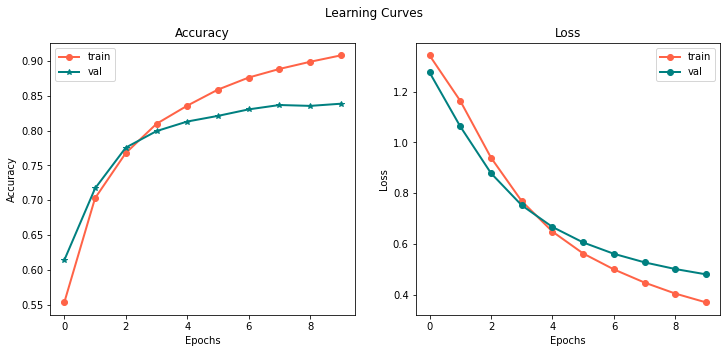

In [19]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['accuracy']))

ax[0].plot(epochs,history.history['accuracy'],label='train',lw=2,marker='o',color='tomato')
ax[0].plot(epochs,history.history['val_accuracy'],label='val',lw=2,marker='*',color='teal')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()


ax[1].plot(epochs,history.history['loss'],label='train',lw=2,marker='o',color='tomato')
ax[1].plot(epochs,history.history['val_loss'],label='val',lw=2,marker='o',color='teal')
ax[1].set_title('Loss')
ax[1].legend()

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.suptitle('Learning Curves')
plt.show()

## Looks like overfitting , let it slide for now, its too late, i'm sleepy

In [22]:
model.evaluate(test_ds)

250/250 [==============================] - 2s 9ms/step - loss: 0.4707 - accuracy: 0.8464


[0.4706994891166687, 0.8463749885559082]

## Deploy Model

In [25]:
export_model=tf.keras.models.Sequential([
                                         vectorize_layer,
                                         model,
                                         tf.keras.layers.Activation('softmax')
])

In [27]:
export_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
export_model.evaluate(raw_test_ds)

250/250 [==============================] - 3s 10ms/step - loss: 0.4707 - accuracy: 0.8464


[0.47069963812828064, 0.8463749885559082]

In [29]:
example=["django.db.utils.OperationalError: (1292, “Truncated incorrect INTEGER value: 'incompleted'”) django",
         "Looking for an implementation of an abstract method",
         "list item stay open on click a link or reload/refresh page"]
predictions=export_model.predict(example)    
predictions

array([[0.2783635 , 0.20593166, 0.26838145, 0.24732344],
       [0.29803222, 0.23270428, 0.3051113 , 0.16415222],
       [0.27440092, 0.12934966, 0.42383432, 0.17241511]], dtype=float32)

In [37]:
import numpy as np
np.argmax(predictions,axis=1)

array([0, 2, 2])

In [38]:
raw_train_ds.class_names[0]

'csharp'

In [39]:
raw_train_ds.class_names[2]

'javascript'